importing all the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Reading data

In [2]:
data = pd.read_csv('C:/Users/dell/Downloads/Salary.csv')
data.head(2)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205


Perform EDA

checking null value is present or not

In [3]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Visualize initial data

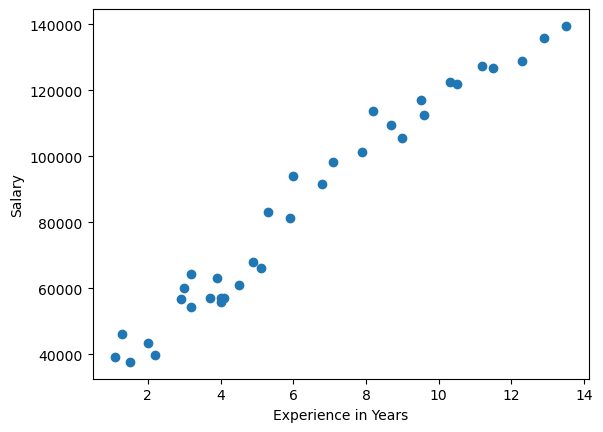

In [6]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.show()

Prepare Data

In [7]:
X = data['YearsExperience']

In [8]:
Y = data['Salary']
X.shape, Y.shape

((35,), (35,))

Reshape the data for the model

In [9]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [10]:
X.shape, Y.shape

((35, 1), (35, 1))

Spliting the data to Train and Test

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

Define Linear Regression Model

In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Model test with the testing data

In [13]:
pred = model.predict(X_test)
pred

array([[ 80430.70927962],
       [ 56616.04598277],
       [ 88368.93037856],
       [147464.57633739],
       [127178.01130675],
       [112183.5936754 ],
       [107773.47084266]])

In [14]:
Y_test

array([[ 81363],
       [ 54445],
       [ 91738],
       [139465],
       [127345],
       [116969],
       [105582]], dtype=int64)

Check Actual Data, Predicted data and Difference Data

In [15]:
diff = Y_test - pred
diff

array([[  932.29072038],
       [-2171.04598277],
       [ 3369.06962144],
       [-7999.57633739],
       [  166.98869325],
       [ 4785.4063246 ],
       [-2191.47084266]])

In [16]:
pd.DataFrame(np.c_[Y_test, pred, diff], columns=['Actual','Prediction','Difference'])

,Actual,Prediction,Difference
0,81363.0,80430.709280,932.290720
1,54445.0,56616.045983,-2171.045983
2,91738.0,88368.930379,3369.069621
3,139465.0,147464.576337,-7999.576337
4,127345.0,127178.011307,166.988693
5,116969.0,112183.593675,4785.406325
6,105582.0,107773.470843,-2191.470843


Visualise the model upon Training Data

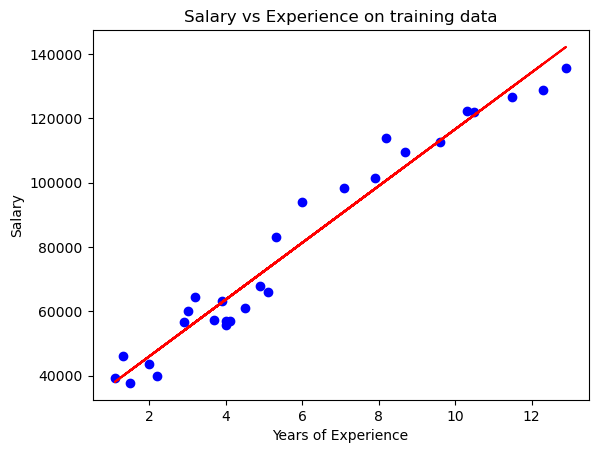

In [17]:
plt.scatter(X_train, Y_train, color="blue")
plt.plot(X_train, model.predict(X_train), color="red")
plt.title('Salary vs Experience on training data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualize the model on test data

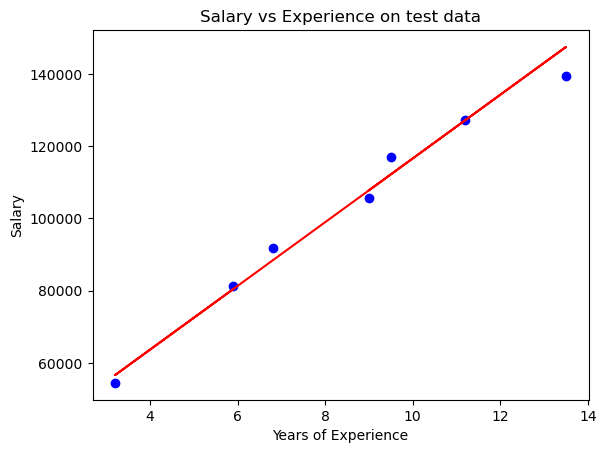

In [18]:
plt.scatter(X_test, Y_test, color="blue")
plt.plot(X_test,model.predict(X_test),color="red")
plt.title('Salary vs Experience on test data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Evaluating the model

In [20]:
model.score(X_train, Y_train)

0.9586772385791824

In [21]:
model.score(X_test,Y_test)

0.9785870620257094

In [22]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)

In [23]:
rmse, r2

(3939.851369710108, 0.9785870620257094)

Testing with the custom data

In [24]:
exp = 3
model.predict([[exp]])[0]
print(f"Salary: {int(model.predict([[exp]])[0])} for {exp} Year Experience")

Salary: 54851 for 3 Year Experience


In [36]:
exp=10
int(model.predict([[exp]])[0])

116593